<a href="https://colab.research.google.com/github/Vishruth-N/FormulAE-1/blob/main/AE_Project_compiled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1><center>FormulAE - 1</center></h1>
#<h1><center>The Racing Analysts!</center></h1>

###Importing all the modules required:

In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import norm,chi2,t
from math import sqrt
import seaborn as sns

##In this project, we analyse two random variables from various Formula 1 races, namely


*   Average Pitstop time in a race for a particular driver in a race
*   Average Laptime in that particular race



##Now, let's take a look at our Raw data, the average Lap times and the average Pitstop times.

In [107]:
df1=pd.read_csv("filtered merged.csv")
df1

,Unnamed: 0,Race ID,Driver ID,position,avg laptime,Avg Pit Time
0,0,841,1,2.0,92975.103448,23213.000000
1,1,42,18,12.0,76989.958333,23252.750000
2,2,842,1,7.0,105531.946429,23252.750000
3,3,43,18,8.0,78758.357143,20659.333333
4,4,843,1,1.0,103896.892857,20659.333333
...,...,...,...,...,...,...
3921,4097,1052,854,16.0,101830.981818,25570.500000
3922,4099,1054,854,17.0,88732.046875,23572.666667
3923,4100,1055,854,18.0,87365.500000,23158.000000
3924,4101,1056,854,18.0,79684.253333,24797.000000


###Inspecting the basic parameters of our dataset using pandas:

In [82]:
df1.drop(columns=['Unnamed: 0','Race ID','Driver ID','position']).describe()

,avg laptime,Avg Pit Time
count,3926.000000,3926.000000
mean,99494.193197,24696.035885
std,19008.187893,4411.361896
min,62932.344828,16549.000000
25%,87230.852046,22085.500000
50%,99278.283019,23666.500000
75%,107601.534391,25953.000000
max,379323.607143,89258.000000


##Now, let's have a closer look at the mean and standard deviation of our data
###For the Pitstop times:

In [114]:
truemean=df1['Avg Pit Time'].mean()
truestd=df1['Avg Pit Time'].std()
print("The true Mean and Standard deviation of the Pitstop times of the drivers are {} seconds and {} seconds respectively".format(round(truemean/1000,2),round(truestd/1000,2)))

The true Mean and Standard deviation of the Pitstop times of the drivers are 24.7 seconds and 4.41 seconds respectively


##The histogram plot that can approximate the true distribution of the Pitstop time data is:

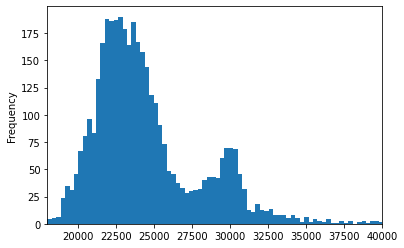

In [85]:
df1['Avg Pit Time'].plot.hist(bins=250)
plt.xlim(18000,40000);

###For the Lap times:

In [115]:
mean_lap=df1['avg laptime'].mean()
std_lap=df1['avg laptime'].std()
print("The true Mean and Standard deviation of the Lap times of the drivers are {} seconds and {} seconds respectively".format(round(mean_lap,2),round(std_lap,2)))

The true Mean and Standard deviation of the Lap times of the drivers are 99494.19 seconds and 19008.19 seconds respectively


##The histogram plot that can approximate the true distribution of the Lap time data is:

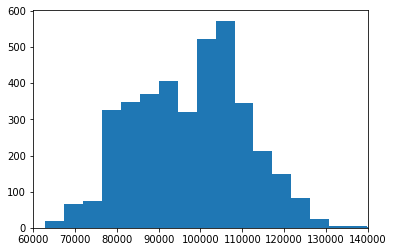

In [86]:
plt.hist(df1['avg laptime'],bins=70);
plt.xlim(60000,140000);

##The Scatter plot of the two random variables can be obtained as follows:

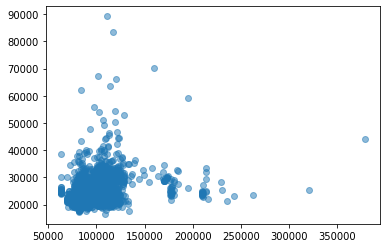

In [87]:
plt.scatter(y = df1['Avg Pit Time'],x = df1['avg laptime'],alpha=0.5);

##Let's look at the Joint distribution of the lap times and the pitstop time data using the ```jointplot``` function from ```seaborn```

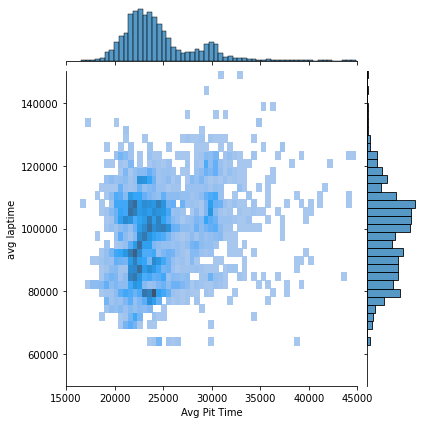

In [88]:
g = sns.jointplot(data=df1, x="Avg Pit Time", y="avg laptime", kind="hist",xlim=(15000,45000), ylim=(50000,150000));

In [89]:
data=pd.read_csv('filtered merged.csv')
data=data.dropna()

###Before generating the sampling distribution of the sample means and variances for our data, let us recall the true parameters.

Parameter | Pitstop Times  | Lap times
----------|-------------------|------------------
Mean      |24.7 seconds  | 99494 seconds
Variance |4.41 seconds      | 19008 seconds



##Generating the Sampling distribution of the sample means and variances for the data

###Generating the samples for Laptimes:

In [93]:
means=[]
variances=[]
stds=[]
for i in range(1000):
    sample=data['avg laptime'].sample(100,replace=True)
    means.append(sample.mean())
    variances.append(sample.var())
    stds.append(sample.std())
    

##Plot of the sampling distribution for laptimes

###Mean:

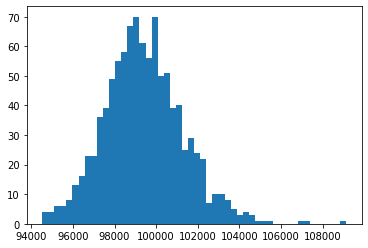

In [94]:
plt.hist(means,bins=50)
plt.show()

###Variance:

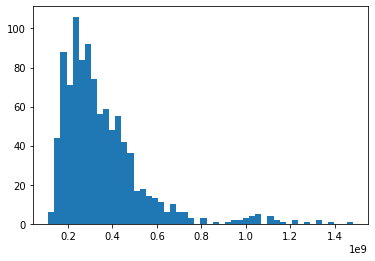

In [95]:
plt.hist(variances,bins=50)
plt.show()

###Similarly,generating the samples for Pitstop times:

In [97]:
means_=[]
variances_=[]
stds_=[]
for i in range(1000):
    sample=data['Avg Pit Time'].sample(100,replace=True)
    means_.append(sample.mean())
    variances_.append(sample.var())
    stds_.append(sample.std())
    

##Plot of the sampling distribution for Pitstop times

###Mean:

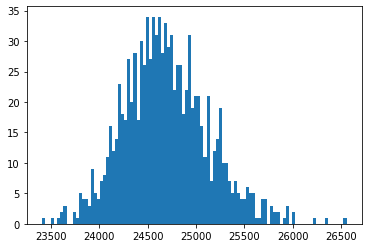

In [98]:
plt.hist(means_,bins=100)
plt.show()

###Variance:

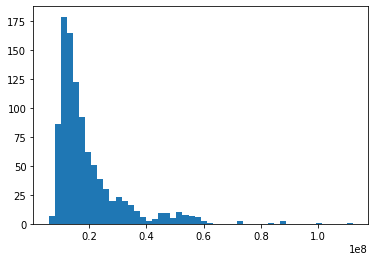

In [99]:
plt.hist(variances_,bins=50)
plt.show()

###Now that we have plotted the sampling distribution for a specific number of samples, we can advance it further by exploring the sampling distributions when the sample sizes and number of samples can be varied

In [100]:
def f(Input,value,sample_size,bins):
    mean=[]
    variance=[]
    std=[]
    if Input=='Laptime':
        x='avg laptime'
    else :
        x='Avg Pit Time'
    for i in range(1000):
        sample=data[x].sample(sample_size,replace=True)
        mean.append(sample.mean())
        variance.append(sample.var())
        std.append(sample.std())
    plt.hist(eval(value),bins=bins)
    

In [101]:
interact(f,Input=['Laptime',"Pit Time"],value=['mean','variance','std'],sample_size=(1,1000),bins=(1,500));

interactive(children=(Dropdown(description='Input', options=('Laptime', 'Pit Time'), value='Laptime'), Dropdow…

##<b>Point and Interval Estimates of Laptime and Pit Time Parameters</b>

In [102]:
#POINT ESTMATION OF MEAN AND VARIANCE OF LAPTIME
s_means=[]
S=[]

for i in range(1000):
    sample=np.array(data['avg laptime'].sample(100,replace=True))
    sample_mean=sample.mean()
    s_means.append(sample_mean)
    sample_S=np.sum(pow(sample-sample_mean,2))/(100-1)
    S.append(sample_S)
print('Estimate of MEAN LAPTIME :',np.mean(s_means)) 
print('True MEAN LAPTIME :',data['avg laptime'].mean(),'\n') 
print('Estimate of VARIANCE LAPTIME DATA :',np.var(s_means))  
print('True VARIANCE of LAPTIME DATA :',data['avg laptime'].var()) 

Estimate of MEAN LAPTIME : 99480.293661752
True MEAN LAPTIME : 99494.19319722841 

Estimate of VARIANCE LAPTIME DATA : 3285873.7074307096
True VARIANCE of LAPTIME DATA : 361311206.95998484


In [103]:
#POINT ESTMATION OF MEAN AND VARIANCE OF PIT TIME
s_means=[]
S=[]

for i in range(1000):
    sample=np.array(data['Avg Pit Time'].sample(100,replace=True))
    sample_mean=sample.mean()
    s_means.append(sample_mean)
    sample_S=np.sum(pow(sample-sample_mean,2))/(100-1)
    S.append(sample_S)
print('Estimate of MEAN PIT TIME :',np.mean(s_means)) 
print('True MEAN PIT TIME :',data['Avg Pit Time'].mean(),'\n') 
print('Estimate of VARIANCE PIT TIME DATA :',np.var(s_means))  
print('True VARIANCE of PIT TIME DATA :',data['Avg Pit Time'].var())

Estimate of MEAN PIT TIME : 24683.776595
True MEAN PIT TIME : 24696.035884700286 

Estimate of VARIANCE PIT TIME DATA : 184805.56545494843
True VARIANCE of PIT TIME DATA : 19460113.77522369


In [104]:
#CONFIDENCE INTERVAL ESTIMATION OF MEAN AND VARIANCE 

def comp_interval(Input,value,sample_size,Conf_level):
    if Input=='Laptime':
        x='avg laptime'
    else :
        x='Avg Pit Time'
    sample=np.array(data[x].sample(sample_size,replace=True))
    if value=='mean':        
        mu=data[x].mean()  
        x_bar=np.mean(sample)
        S=np.std(sample)
        t_CI=t(sample_size-1).ppf((1-(Conf_level/100))/2)
        cmin,cmax=x_bar+(t_CI*(S/sqrt(sample_size))),x_bar-(t_CI*(S/sqrt(sample_size)))    
        return print('True mean of',Input,' :',mu,'\n',Conf_level,'% confidence interval : ',[cmin,cmax])
    else:
        variance=data[x].var() 
        S=np.var(sample)
        alpha=1-(Conf_level/100)
        cmax,cmin=sample_size*(S/chi2(sample_size-1).ppf(alpha/2)),(sample_size*(S/chi2(sample_size-1).ppf(1-(alpha/2))))
        return print('True variance of',Input,' :',variance,'\n',Conf_level,'% confidence interval : ',[cmin,cmax])
        


In [105]:
interact(comp_interval,Input=['Laptime',"Pit Time"],value=['mean','variance'],sample_size=(1,1000),Conf_level=(50,99.9));

interactive(children=(Dropdown(description='Input', options=('Laptime', 'Pit Time'), value='Laptime'), Dropdow…

In [106]:
datanew = df1.drop(columns=['Unnamed: 0','Race ID','Driver ID','position'])
datanew.corr(method= 'pearson')

,avg laptime,Avg Pit Time
avg laptime,1.000000,0.237987
Avg Pit Time,0.237987,1.000000
